In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange, linspace, mean
from scipy.stats import expon, zscore, norm, uniform
import math
%matplotlib inline

# 중심위치척도

## 평군, 중앙값, 최빈값 구하기

In [2]:
from statistics import mean, median ,mode 

np.random.seed(0)
x = (np.random.randint(20, size = 1000)) # 0부터 19까지 랜덤으로 숫자 배열 생성

print("mean(x):", mean(x))

print("median(x):", median(x))

print("mode(x):", mode(x))

mean(x): 9
median(x): 9.0
mode(x): 3


# 변동성 척도

## 사분위수

- 데이터 표본을 4개의 동일한 부분으로 나눈 값 (n은 총 도수)
    - Q1 = 1+(n-1)x0.25
    - Q2 = 중앙값
    - Q3 = 1+(n-1)x0.75

In [3]:
from statistics import quantiles # quantiles = 분위수를 계산하는 함수

x=[1,2,3,4,5,6,7,8,9,10]
print('method를 inclusive로 했을 때:', quantiles(x, method = 'inclusive')) # inclusive = 데이터를 4등분 하는 지점에서 값 출력
print('method를 exclusive로 했을 때:', quantiles(x, method = 'exclusive')) # exclusive = 데이터의 값을 포함하지 않고 값 사이에서 출력

x=np.array([1,2,3,4,5,6,7,8,9,10])
print('numpy로 계산했을 때:', np.quantile(x, [0.25, 0.5, 0.75])) # 특정 분위 수 계산

#five number summary 
q=quantiles(x, n=4, method='inclusive')
print('다섯 범위를 확인할 때', min(x), q[0], q[1], q[2], max(x) )

method를 inclusive로 했을 때: [3.25, 5.5, 7.75]
method를 exclusive로 했을 때: [2.75, 5.5, 8.25]
numpy로 계산했을 때: [3.25 5.5  7.75]
다섯 범위를 확인할 때 1 3.25 5.5 7.75 10


## 사분위간 범위(IQR)

In [4]:
x=np.array([1,2,3,4,5,6,7,8,9,10])

#x의 IQR

q = np.quantile(x, [0.25, 0.5, 0.75])
q[2]-q[0] # 3사분위 수에서 1사분위 수를 뺀 값

4.5

## 범위(최댓값-최솟값)

In [9]:
#x의 range 

x=[1,2,3,4,5,6,7,8,9,10]
max(x)-min(x) 

9

# 분산, 표준편차, 변동계수 구하기

In [10]:
#분산, 표준편차, 변동 계수 예제 

from statistics import variance, stdev, mean

x=[1,2,3,4,5,6,7,8,9,10]

print('분산 :',variance(x))
print('표준편차 :',stdev(x)) 
print('변동 계수 :', (stdev(x) / mean(x))*100) # 변동 계수가 작을수록 데이터의 상대적인 변동성이 낮다고 해석할 수 있으며, 
                                                 # 변동 계수가 클수록 데이터의 상대적인 변동성이 높다

분산 : 9.166666666666666
표준편차 : 3.0276503540974917
변동 계수 : 55.04818825631803


# 연관성척도(붓꽃 데이터 활용)

## 데이터 불러오기

In [11]:
import pandas as pd
iris = pd.read_csv('iris.csv',encoding = 'cp949') # 파일위치에 맞게 불러오기 
iris.head(5)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종류
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 공분산과 상관계수 구하기

- __공분산과 상관계수의 차이__

    공분산은 두 변수의 편차를 곱한 평균, 상관계수는 공분산을 각 변수의 표준편차의 곱으로 나눈 값  
    공분산은 단위에 영향을 받고, 상관계수보다 해석이 어려울 수 있어 보통 상관계수를 많이 사용

In [20]:
iris['종류'].drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [12]:
# 분산 공분산 표
iris.cov()

ValueError: could not convert string to float: 'setosa'

In [13]:
#꽃받침길이와 꽃받침너비의 공분산
iris.cov().iloc[:2,:2]

ValueError: could not convert string to float: 'setosa'

In [14]:
# 상관계수 표
iris.corr()

ValueError: could not convert string to float: 'setosa'

In [21]:
#꽃받침길이와 꽃받침너비의 상관계수
x = iris['꽃받침길이']
y = iris['꽃받침너비']
x.corr(y)  # Pearson correlation

-0.11756978413300198

# 확률분포

## 정규분포

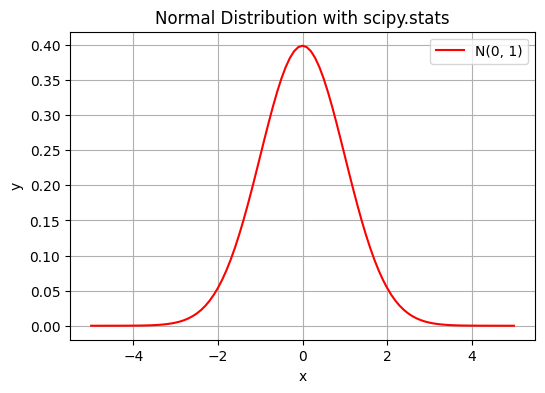

In [22]:
import scipy.stats as stats

x = np.linspace(-5, 5, 101)
y1 = stats.norm(0, 1).pdf(x)        

plt.figure(figsize=(6, 4))          # 플롯 사이즈 지정
plt.plot(x, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성          
plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("Normal Distribution with scipy.stats")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show()                           # 플롯 보이기

## T 분포

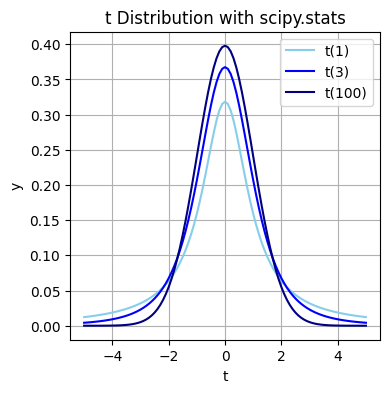

In [23]:
fig = plt.figure(figsize=(4, 4))

t = np.linspace(-5, 5, 101)   # t 정의

y1 = stats.t(1).pdf(t)                 
plt.plot(t, y1, color="skyblue", label = "t(1)")         
plt.xlabel("t")                     
plt.ylabel("y")                     
plt.grid()                           
plt.title("t Distribution with scipy.stats")     
     
y1 = stats.t(3).pdf(t)                
plt.plot(t, y1, color="blue", label = "t(3)")         
plt.xlabel("t")                     
plt.ylabel("y")                     
plt.grid()                           
plt.title("t Distribution with scipy.stats")     
plt.legend(["t(3)"])                      

y1 = stats.t(100).pdf(t)               
plt.plot(t, y1, color="navy", label = "t(100)")         
plt.xlabel("t")                     
plt.ylabel("y")                     
plt.grid()                           
plt.title("t Distribution with scipy.stats")     
plt.legend()      

plt.show()

## 카이스퀘어 분포

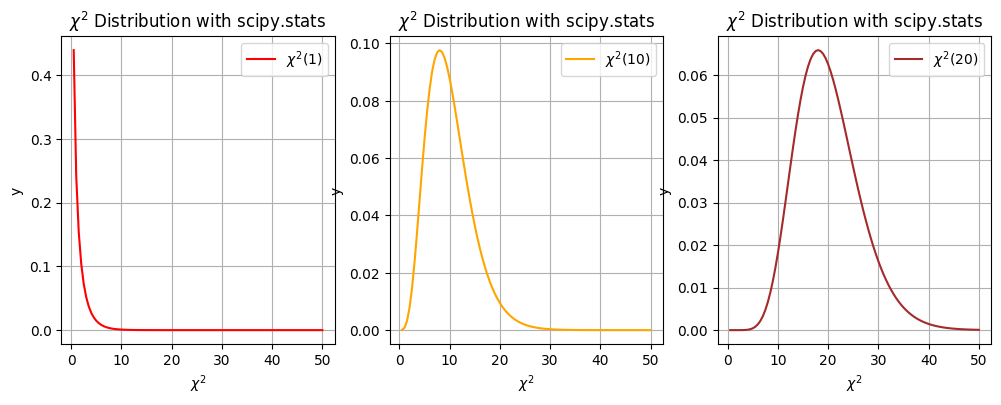

In [24]:
fig = plt.figure(figsize=(12, 4))

chi2 = np.linspace(0.5, 50, 100)
y1 = stats.chi2(1).pdf(chi2)        

ax1 = fig.add_subplot(1, 3, 1)        
ax1 = plt.plot(chi2, y1, color="red", label=r'$\chi^2$(1)')          
ax1 = plt.xlabel(r'$\chi^2$')            
ax1 = plt.ylabel("y")                    
ax1 = plt.grid()                        
ax1 = plt.title(r'$\chi^2$ Distribution with scipy.stats')    
ax1 = plt.legend()                       

y1 = stats.chi2(10).pdf(chi2)        
ax2 = fig.add_subplot(1, 3, 2)
ax2 = plt.plot(chi2, y1, color="orange", label=r'$\chi^2$(10)')        
ax2 = plt.xlabel(r'$\chi^2$')             
ax2 = plt.ylabel("y")                     
ax2 = plt.grid()                        
ax2 = plt.title(r'$\chi^2$ Distribution with scipy.stats')    
ax2 = plt.legend()                     

y1 = stats.chi2(20).pdf(chi2)        
ax3 = fig.add_subplot(1, 3, 3)
ax3 = plt.plot(chi2, y1, color="brown", label=r'$\chi^2$(20)')        
ax3 = plt.xlabel(r'$\chi^2$')             
ax3 = plt.ylabel("y")                     
ax3 = plt.grid()                        
ax3 = plt.title(r'$\chi^2$ Distribution with scipy.stats')    
ax3 = plt.legend()  

plt.show()

정규분포의 제곱, 모두 양수로 나타남  
자유도가 커질 수록 평균과 분산이 증가함

## F분포

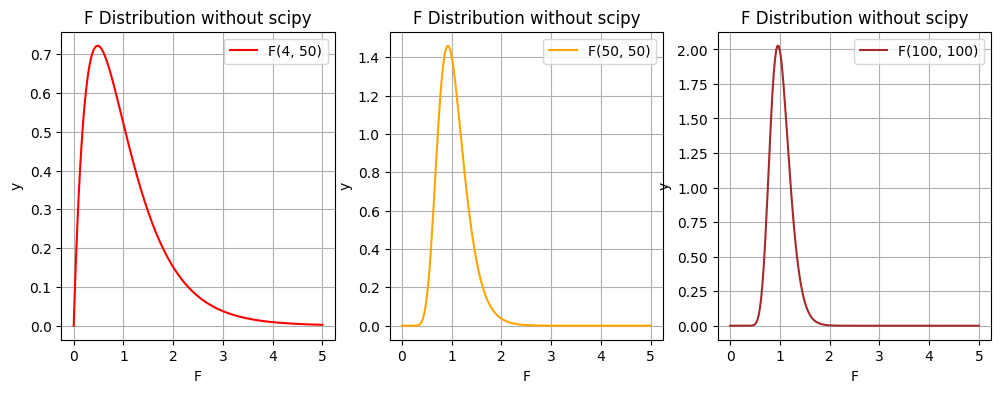

In [25]:
fig = plt.figure(figsize=(12, 4))

x = np.linspace(0, 5, 201)
nu1 = 4 ; nu2 = 50                   #자유도가 2개 : 집단이 2개이므로
y1 = stats.f(nu1, nu2).pdf(x)        # 자유도를 높이면 정규분포의 모양을 띔

ax1 = fig.add_subplot(1, 3, 1)   
ax1 = plt.plot(x, y1, color="red", label='F(4, 50)')   
ax1 = plt.xlabel('F')                    
ax1 = plt.ylabel("y")                     
ax1 = plt.grid()                          
ax1 = plt.title('F Distribution without scipy')           
ax1 = plt.legend()  

nu1 = 50 ; nu2 = 50                 
y1 = stats.f(nu1, nu2).pdf(x)       

ax2 = fig.add_subplot(1, 3, 2)   
ax2 = plt.plot(x, y1, color="orange", label='F(50, 50)')       
ax2 = plt.xlabel('F')                  
ax2 = plt.ylabel("y")                   
ax2 = plt.grid()                          
ax2 = plt.title('F Distribution without scipy')                         
ax2 = plt.legend()  

nu1 = 100 ; nu2 = 100                  
y1 = stats.f(nu1, nu2).pdf(x)       

ax3 = fig.add_subplot(1, 3, 3)   
ax3 = plt.plot(x, y1, color="brown", label='F(100, 100)')         
ax3 = plt.xlabel('F')                    
ax3 = plt.ylabel("y")                     
ax3 = plt.grid()                         
ax3 = plt.title('F Distribution without scipy')          
ax3 = plt.legend()  

plt.show()

카이제곱분포의 비율에 관한 확률분포  
자유도가 증가할수록 확률밀도의 함수 모양이 정규분포에 가까워지며, 분산이 감소한다.  
정규분포에 가까워지지만 왜도를 가질 수 있다는 점이 정규분포 그래프와 차이점

## 이항분포 + 베르누이분포

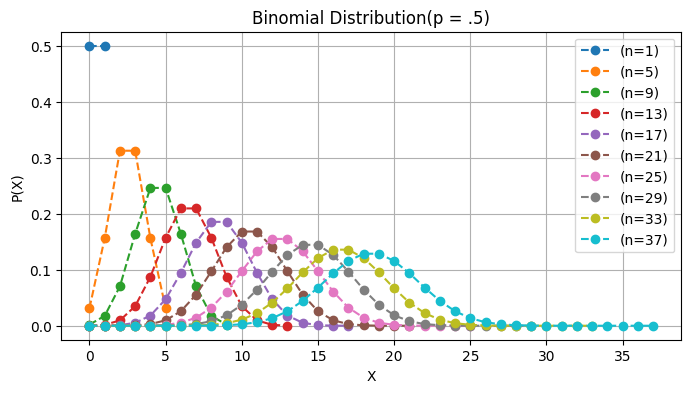

In [26]:
from scipy.stats import binom
p = .5
plt.figure(figsize=(8, 4))

for n in arange(1, 41, 4): # N = 1 일때 베르누이 분포
    x = arange(n + 1)
    plt.plot(x, binom(n, p).pmf(x), 'o--', label='(n=' + str(n) + ')')
    
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Binomial Distribution(p = .5)')
plt.grid()
plt.legend()
plt.show()

## 포아송분포

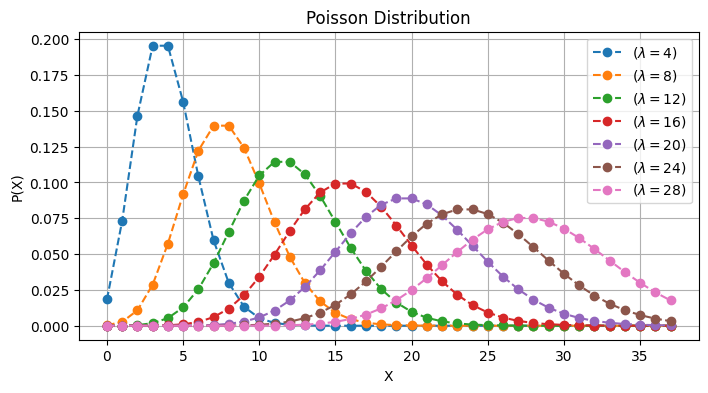

In [27]:
from scipy.stats import poisson

plt.figure(figsize=(8, 4))

for l in arange(4, 30, 4):
    plt.plot(x, poisson(l).pmf(x), 'o--', label=r'$(\lambda =$' + str(l) + ')')
    
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Poisson Distribution')
plt.grid()
plt.legend()
plt.show()

# 모집단 VS 표본 집단

- 우리나라 성인 평균 키 구하기
- 이때 우리나라 성인 전체를 모집단이라고 부르고 성인 평균 키는 모집단의 특성을 나타내는 모수이라고 한다

In [28]:
random.seed(10)

Height = list()
for i in range(100000) : #100000개의 데이터를 랜덤하게 생성
    Height.append(random.randrange(140, 200)) # 140부터 199까지의 숫자를 생성하고 Height에 추가
mean = sum(Height) / len(Height)
mean

169.43082

In [29]:
random.seed(10)

sample10_Height = random.sample(Height, 10) #표본 10개 추출
sample10_mean = sum(sample10_Height) / len(sample10_Height)
print("표본 10개 :",sample10_mean)

sample100_Height = random.sample(Height, 100) #표본 10개 추출
sample100_mean = sum(sample100_Height) / len(sample100_Height)
print("표본 100개 :",sample100_mean)

sample1000_Height = random.sample(Height, 1000) #표본 10개 추출
sample1000_mean = sum(sample1000_Height) / len(sample1000_Height)
print("표본 1000개 :",sample1000_mean)

sample10000_Height = random.sample(Height, 10000) #표본 10개 추출
sample10000_mean = sum(sample10000_Height) / len(sample10000_Height)
print("표본 10000개 :",sample10000_mean)

print("모집단 :",mean)

표본 10개 : 170.6
표본 100개 : 168.83
표본 1000개 : 169.24
표본 10000개 : 169.4287
모집단 : 169.43082


아래의 결과를 보면 표본의 평균이 얼추 모집단의 평균과 비슷한 것을 확인할 수 있다
이처럼 우리는 모집단과 모수를 알수 없지만 표본과 표본 통계량을 통해 모집단을 추론/추정 할 수 있다

# 대수의 법칙 OR 라플라스 정리

In [31]:
print("표본 10개의 오차(절댓값) :",abs(mean - sample10_mean))
print("표본 100개의 오차(절댓값) :",abs(mean -sample100_mean))
print("표본 1000개의 오차(절댓값) :",abs(mean -sample1000_mean))
print("표본 10000개의 오차(절댓값) :",abs(mean -sample10000_mean))

표본 10개의 오차(절댓값) : 1.169179999999983
표본 100개의 오차(절댓값) : 0.6008199999999988
표본 1000개의 오차(절댓값) : 0.1908200000000022
표본 10000개의 오차(절댓값) : 0.0021200000000192176


## 중심 극한 정리

In [32]:
from numpy import mean

# 시뮬레이션 함수 생성
def test (times_size):
    t = times_size ; l = 10 ; loc = 0; m = []
    for i in arange(t):
        m.append(mean(expon(loc, l).rvs(size=times_size)))
    
    z = zscore(m)
    b = int(6 * math.log10(t))
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = plt.hist(m, bins=b, facecolor='wheat')
    ax1 = plt.xlabel('m')
    ax1 = plt.ylabel('frequency')
    ax1 = plt.title(r'Histogram of Random Exponential ($\lambda = 10, size = $' + str(t) + ')')
    ax1 = plt.grid()

    x = linspace(-3, 3, 101)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = plt.hist(z, bins=b, density=True, facecolor='skyblue')
    ax2 = plt.plot(x, norm(0, 1).pdf(x), 'r--')
    ax2 = plt.xlabel('z')
    ax2 = plt.ylabel('density')
    ax2 = plt.title(r'Histogram of Random Exponential ($\lambda = 10, size = $' + str(t) + ')')
    ax2 = plt.grid()

    plt.show()

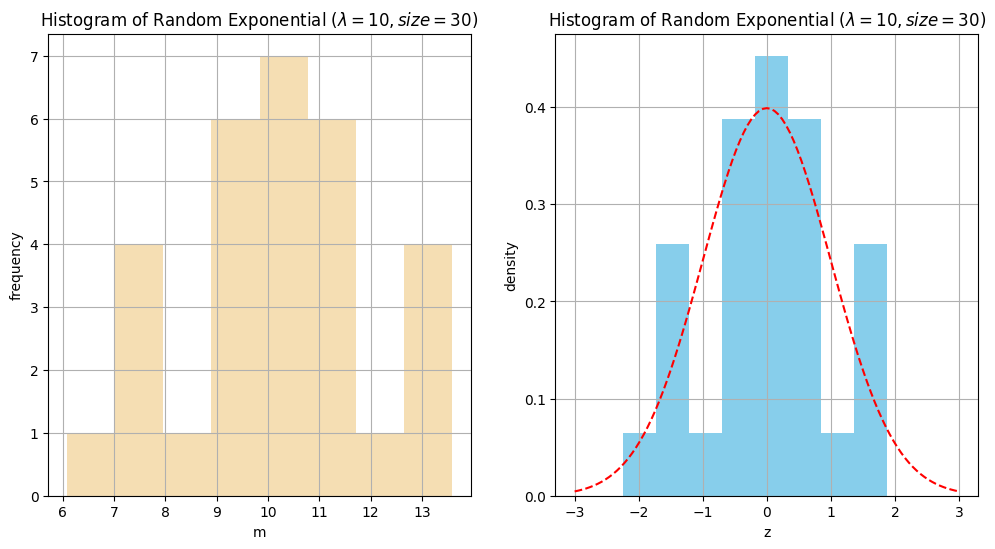

In [33]:
# 30일때 시뮬레이션
test(30) # 두 번째는 표준화 한 값

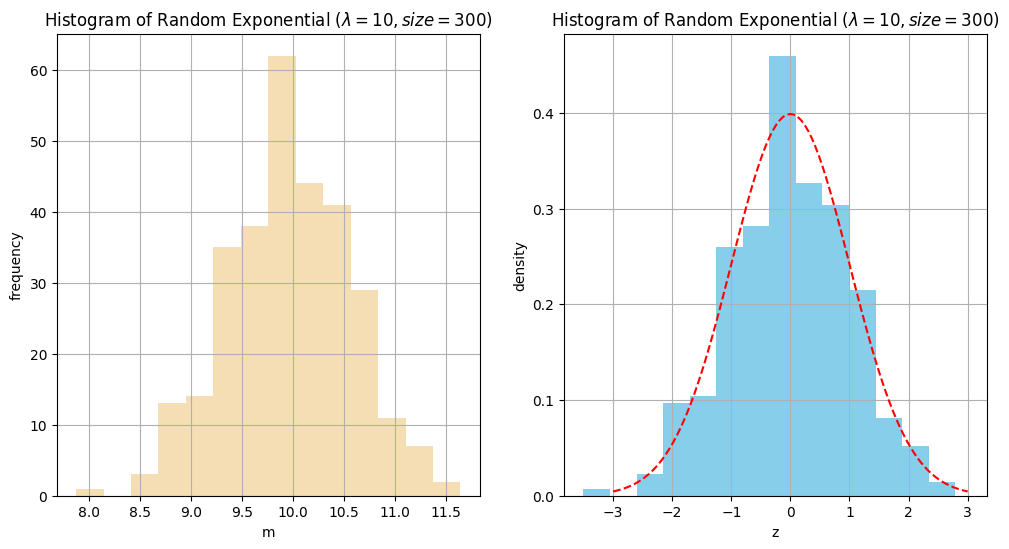

In [34]:
# 300일때 시뮬레이션
test(300)

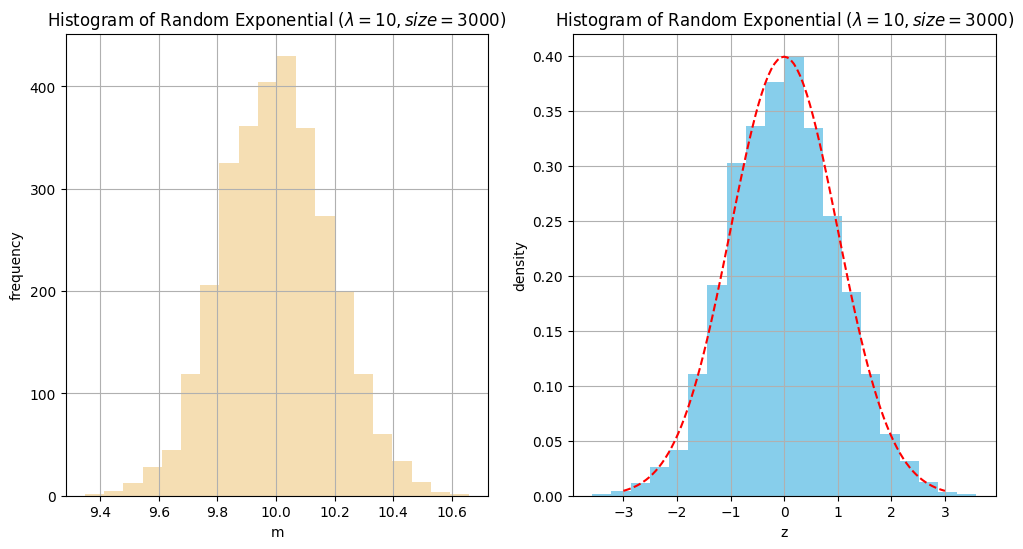

In [35]:
# 3000일때 시뮬레이션
test(3000)

시뮬레이션을 많이 돌릴 수록 모양이 정규분포에 가까워진다.

# 가설검정

__T 검정__  
- 두 그룹 간의 평균 비교를 위해 많이 사용  
- t-통계량을 사용 (두 그룹 간의 평균 차이와 표준 오차 간의 관계)  

__F 검정__  
- 세 개 이상 그룹 간의 평균 비교를 위해 사용  
- f-통계량을 사용 (그룹 간의 분산 차이와 그룹 내 분산 차이 간의 관계)

## T검정

In [36]:
# 예시 1 : T검정
# sample A와 B의 평균이 차이가 있는지 검정하기
from scipy.stats import ttest_ind

sample_A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sample_B = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# ttest_ind는 두 집단의 평균에 통계적으로 유의미한 차이가 있는지 T검정하는 함수이며,
# 귀무가설은 H0 :'두 집단의 평균이 같다'이다 
t_statistic, p_value = ttest_ind(sample_A, sample_B, equal_var=True)

# 유의수준 = 0.05로 정하기
alpha = 0.05

print("t-statistic:", t_statistic) # 2 thumb rule
print("p-value:", p_value)

print(f"유의수준 {alpha}로 가설검정한 결과 :", end = " ")
if p_value < alpha : print("reject H0")
elif p_value >= alpha : print("do not reject H0")

t-statistic: -2.5690465157330253
p-value: 0.0193142516616752
유의수준 0.05로 가설검정한 결과 : reject H0


p-value가 유의수준보다 작음 = 귀무가설 기각

## F검정

In [37]:
# 예시2 : F검정
# 각 그룹의 데이터의 평균이 차이가 있는지 검정하기
from scipy import stats

group1 = [23, 45, 56, 34, 23, 67, 34, 45]
group2 = [56, 34, 78, 23, 12, 89, 45, 67]
group3 = [12, 67, 34, 89, 23, 45, 56, 78]

# F-검정 수행
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# f_oneway는 여러 집단의 평균이 통계적으로 유의미한 차이가 있는지 F검정하는 함수이며,
# 귀무가설은 H0 :'집단1,2,3의 평균이 같다'이다 

# 결과 출력
print("F-statistic: {:.3f}".format(f_statistic))
print("p-value: {:.3f}".format(p_value))

# 유의수준 = 0.01로 정하기
alpha = 0.01

print(f"유의수준 {alpha}로 가설검정한 결과 :", end = " ")
if p_value < alpha : print("reject H0")
elif p_value >= alpha : print("do not reject H0")

F-statistic: 0.438
p-value: 0.651
유의수준 0.01로 가설검정한 결과 : do not reject H0


p-value가 유의수준보다 큼 = 귀무가설 채택

In [38]:
import numpy as np
from scipy import stats

# 실험 데이터 생성
np.random.seed(42)
data = np.random.normal(loc=2, scale=1, size=50)   # 정규 분포를 따르는 난수를 생성하여 data 변수에 저장
                                                    # 평균(loc)이 2, 표준 편차(scale)가 1이고 50개의 표본을 생성합니다.

# 귀무가설(H0) : 광고 전략이 실패한 것이 아니다
# 대립가설(H1) : 광고 전략이 실패했다

# 유의수준 설정
alpha = 0.05

# 검정 통계량 계산
t_stat, p_value = stats.ttest_1samp(data, 1.5) 

# 귀무가설 기각 여부 결정
if p_value < alpha:
    print("귀무가설(H0)을 기각합니다. 광고 전략이 실패했다고 볼 수 있습니다.")
else:
    print("귀무가설(H0)을 채택합니다. 광고 전략이 성공했다고 볼 수 있습니다.")

귀무가설(H0)을 기각합니다. 광고 전략이 실패했다고 볼 수 있습니다.
